# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   [Telco Customer Churn on Kaggle] https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

**Deskripsi Dataset:**
Dataset ini berisi data pelanggan telekomunikasi untuk memprediksi perilaku Churn (berhenti berlangganan).

**Kolom Utama:**
* `Tenure`: Lama berlangganan (bulan).
* `MonthlyCharges`: Biaya bulanan.
* `TotalCharges`: Total biaya.
* `Churn`: Target klasifikasi (Yes/No).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
%pip install mlflow dagshub kagglehub

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -----

In [5]:
# --- KONFIGURASI ---
# pip install mlflow grafana prometheus_client
import mlflow

# Data Manipulation & Numerical Operations
import pandas as pd
import numpy as np
import random

# Data Visualization (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Preprocessing & Split
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Baseline Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Utilities
import warnings
import os
import kagglehub

# Konfigurasi agar output lebih rapi
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)  # Agar semua kolom terlihat

d:\ASAH DICODING\MSML\Proyek Akhir\Eksperimen_SML_EzraAbhinayaPasaribu\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [6]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

# Find the CSV file in the downloaded directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

csv_file_path = os.path.join(path, csv_files[0])
df = pd.read_csv(csv_file_path)

df.head()

100%|██████████| 172k/172k [00:03<00:00, 46.0kB/s]

Extracting files...


Path to dataset files: C:\Users\Ezra's Katana\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Detect duplicate rows
duplicates = df.duplicated().sum()

if duplicates > 0:
    print(f"Number of duplicate rows: {duplicates}")
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


In [10]:
print("\n--- Deteksi Outlier menggunakan Metode IQR ---")

# Identify numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    if len(outliers) > 0:
        print(f"Kolom '{col}': {len(outliers)} outlier terdeteksi (min: {df[col].min()}, max: {df[col].max()})")
    else:
        print(f"Kolom '{col}': Tidak ada outlier terdeteksi.")

# Optional: Display columns with outliers and their counts
print("\nRingkasan Outlier:")
if any(count > 0 for count in outlier_counts.values()):
    for col, count in outlier_counts.items():
        if count > 0:
            print(f"  - '{col}': {count} outliers")
else:
    print("Tidak ada outlier yang signifikan terdeteksi di kolom numerik.")


--- Deteksi Outlier menggunakan Metode IQR ---
Kolom 'SeniorCitizen': 1142 outlier terdeteksi (min: 0, max: 1)
Kolom 'tenure': Tidak ada outlier terdeteksi.
Kolom 'MonthlyCharges': Tidak ada outlier terdeteksi.

Ringkasan Outlier:
  - 'SeniorCitizen': 1142 outliers


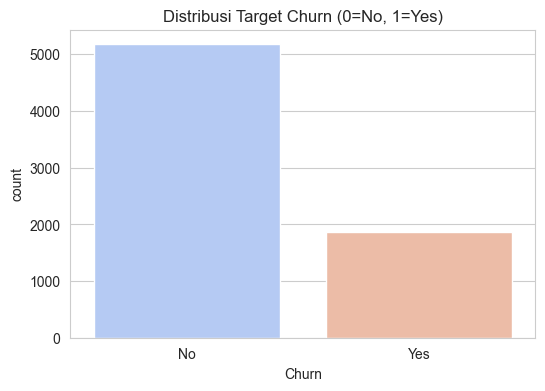

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


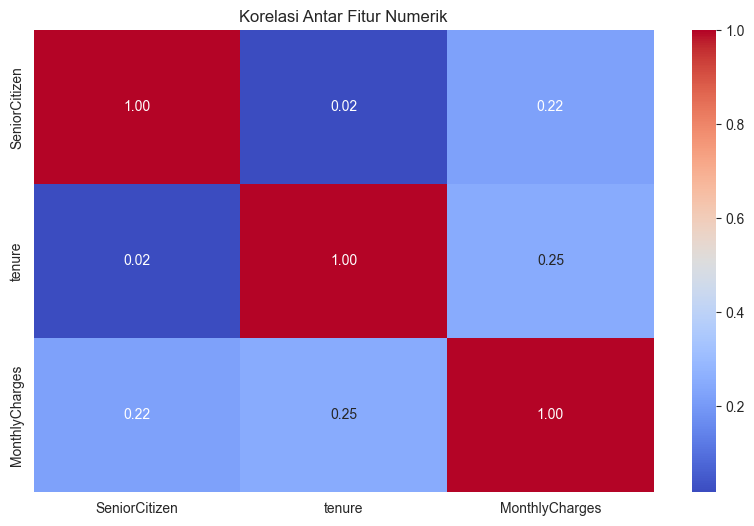

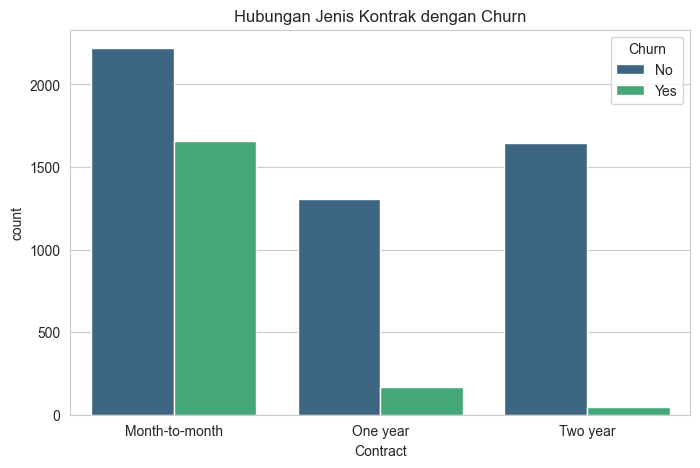

In [11]:
# --- VISUALISASI TARGET ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Distribusi Target Churn (0=No, 1=Yes)')
plt.show()

# Cek persentase
print(df['Churn'].value_counts(normalize=True))

# --- VISUALISASI KORELASI NUMERIK ---
plt.figure(figsize=(10, 6))
# Hanya mengambil kolom numerik untuk korelasi
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

# --- HUBUNGAN KATEGORIKAL (Contoh: Contract vs Churn) ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Hubungan Jenis Kontrak dengan Churn')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# --- CLEANING AWAL ---

# 1. Mengubah TotalCharges menjadi numerik (memaksa error menjadi NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Mengisi missing values dengan 0 atau median
df['TotalCharges'].fillna(0, inplace=True)

# 4. Hapus kolom customerID karena tidak berguna untuk prediksi
df.drop(columns=['customerID'], inplace=True, errors='ignore')

# 5. Ubah target 'Churn' dari Yes/No menjadi 1/0 agar bisa dikorelasi
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 6. Ubah 'gender' dari Male/Female menjadi 0/1
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# 7. Ubah kolom biner 'Yes'/'No' lainnya menjadi 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

In [13]:
# 1. Memisahkan Fitur (X) dan Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Identifikasi kolom Numerik dan Kategorikal secara otomatis
# (Pastikan customerID sudah dibuang di tahap cleaning awal)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Fitur Numerik: {numerical_features}")
print(f"Fitur Kategorikal: {categorical_features}")

# 3. Membuat Pipeline untuk Preprocessing
# Pipeline Numerik: Standard Scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline Kategorikal: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Menggabungkan keduanya dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 5. Terapkan Preprocessing pada data (fit transform pada X)
X_processed = preprocessor.fit_transform(X)

# Mengambil nama kolom baru setelah OneHotEncoding (untuk keperluan dataframe)
feature_names = numerical_features + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Konversi kembali ke DataFrame agar rapi
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# 6. Split Data Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

# Tampilkan 5 baris data yang sudah bersih
X_train.head()

Fitur Numerik: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
Fitur Kategorikal: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Shape X_train: (5634, 40)
Shape X_test: (1409, 40)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,1.009559,-0.439916,-0.966622,1.529024,-0.463037,0.327438,-1.205113,0.002935,-0.416007,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1623,1.009559,-0.439916,-0.966622,-0.654012,0.880735,0.327438,0.829798,1.078118,1.257246,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6074,-0.990532,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.829798,-1.373033,-0.995434,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1362,-0.990532,-0.439916,-0.966622,-0.654012,-1.155283,0.327438,0.829798,0.180747,-0.900800,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6754,-0.990532,-0.439916,-0.966622,1.529024,-1.318165,0.327438,0.829798,-0.095111,-1.005780,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# 6. SIMPAN DATA HASIL PREPROCESSING

Dalam tahap ini, data hasil preprocessing akan disimpan ke dalam file CSV yang dapat digunakan untuk model machine learning.

In [14]:
# # Gabungkan Fitur dan Target agar jadi satu file utuh
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Simpan ke CSV
train_set.to_csv('train.csv', index=False)
test_set.to_csv('test.csv', index=False)